In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from math import *

### Read Data

In [6]:
dd = pd.read_csv('uo_nn_batch_590152-171251704.csv', sep=";")
dd.columns = dd.columns.str.replace(' ', '')

# convert Lk from string to np.array, separated by comma
dd['Lk'] = dd['Lk'].apply(lambda x: np.array(x.split(','), dtype=float))

dd.head()

,num_target,la,isd,niter,tex,tr_acc,te_acc,L*,||g*||,Lk
0,1,0.00,1,84,0.4618,100.0,99.6,5.810000e-07,9.470000e-07,"[0.25, 0.1437, 0.055989, 0.010159, 0.0068473, ..."
1,1,0.00,3,50,0.3009,100.0,99.6,1.380000e-35,1.030000e-34,"[0.25, 0.1437, 0.055619, 0.0077025, 0.0038855,..."
2,1,0.00,7,1625,0.0710,100.0,100.0,1.200000e-03,3.440000e-03,"[0.0012405, 0.0024928, 0.0011406, 0.0014767, 0..."
3,1,0.01,1,55,0.2818,99.6,100.0,2.760000e-02,5.720000e-07,"[0.25, 0.14435, 0.059258, 0.035652, 0.030432, ..."
4,1,0.01,3,47,0.3139,99.6,100.0,2.760000e-02,6.360000e-07,"[0.25, 0.14435, 0.058861, 0.033117, 0.028247, ..."


In [7]:
def show_heatmap(df, isd, val, figsize=(10,5), log:bool = False, vmin:float = None, vmax:float = None, fmt=".0e"):
        t = df[dd['isd'] == isd].pivot_table(index='la', columns='num_target', values=val)
        norm = matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax) if log else None
        plt.figure(figsize=figsize)
        sns.heatmap(t, annot=True, fmt=fmt, linewidths=.5, norm=norm, cmap='viridis')

def plot_val(df, isd, val, log:bool = False):
    t = df[dd['isd'] == isd]
    if log:
        t[val] = np.log(t[val])
    for i in range(10):
        plt.plot(t[t['num_target'] == i]['la'], t[t['num_target'] == i][val], label=i)

# Study of the convergence

## Global convergence

checking the gradient at the last iteration

||g*|| for isd = 1


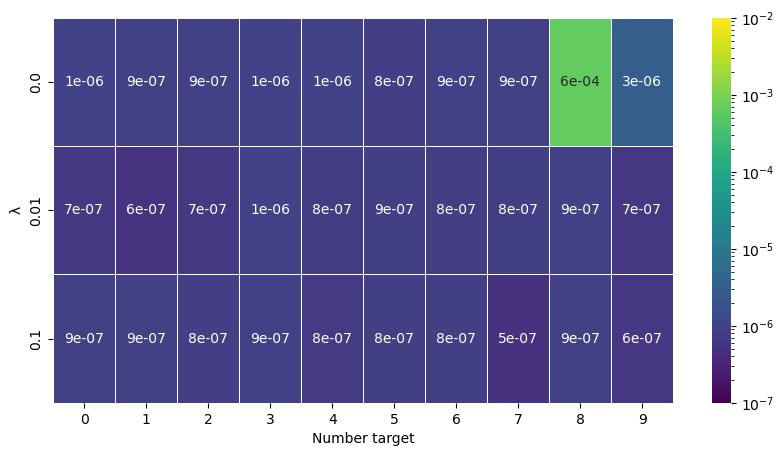

||g*|| for isd = 3


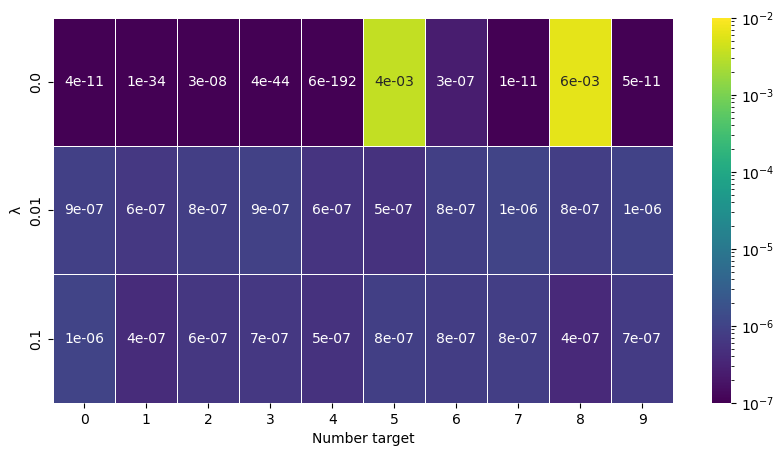

||g*|| for isd = 7


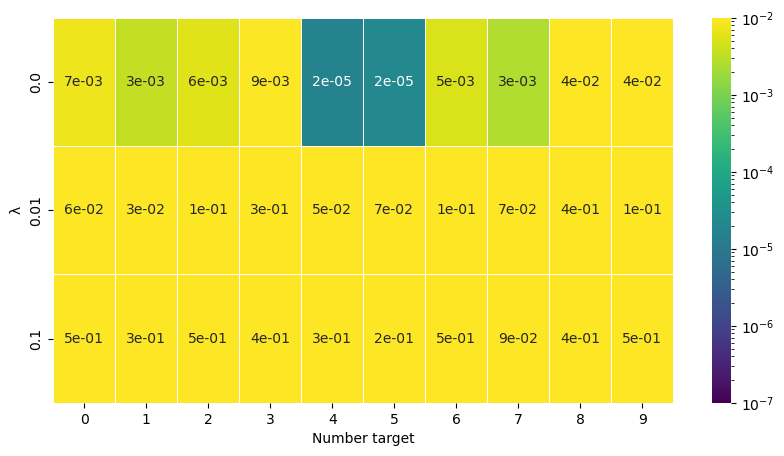

In [8]:
par = '||g*||'
for isd in [1, 3, 7]:
    show_heatmap(dd, isd, par, log=True, vmin=1e-7, vmax=1e-2)
    plt.xlabel('Number target')
    plt.ylabel('λ')
    print(f'{par} for isd = ' + str(isd))
    plt.savefig(f'figures/go_isd_{isd}.png', dpi=300, bbox_inches='tight')
    plt.show()

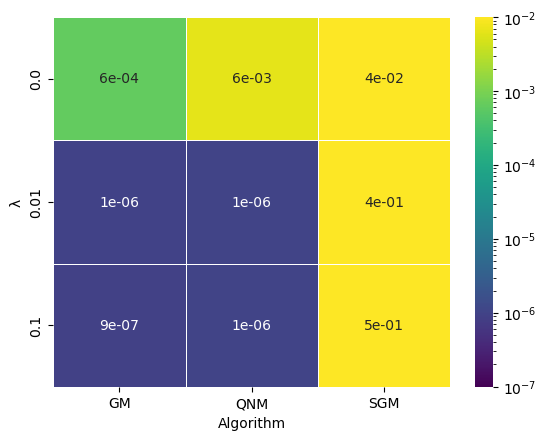

In [9]:
def worst_go(df):
    df = df[['isd', 'la', '||g*||']]
    df = df.sort_values(by=['||g*||'], ascending=False)
    df = df.drop_duplicates(subset=['isd', 'la'])
    return df

wg = worst_go(dd)
isd_names = {1: 'GM', 3: 'QNM', 7: 'SGM'}
wg['isd'] = wg['isd'].apply(lambda x: isd_names[x])
sns.heatmap(wg.pivot_table(index='la', columns='isd', values='||g*||'),annot=True, fmt=".0e", linewidths=.5, norm=matplotlib.colors.LogNorm(vmin=1e-7, vmax=1e-2), cmap='viridis')
plt.xlabel('Algorithm')
plt.ylabel('λ')
plt.savefig('figures/worst_go.png', dpi=300, bbox_inches='tight')
plt.show()

L* for isd = 1


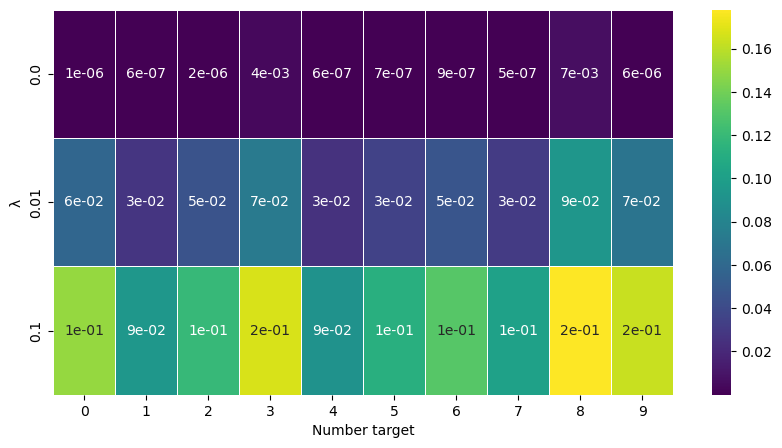

L* for isd = 3


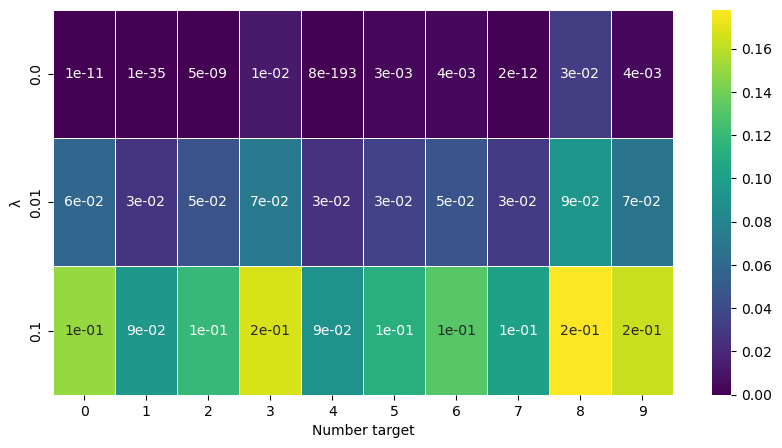

L* for isd = 7


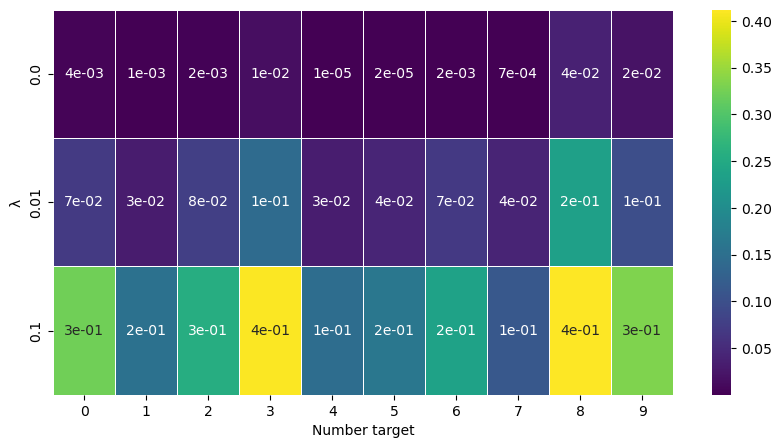

In [19]:
# heat map x axis: number of target, y axis: lambda, color: value of L*
def show_heatmap_L(df, isd, val, figsize=(10,5), log:bool = False, vmin:float = None, vmax:float = None, fmt=".0e"):
        t = df[dd['isd'] == isd].pivot_table(index='la', columns='num_target', values=val)
        norm = matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax) if log else None
        plt.figure(figsize=figsize)
        sns.heatmap(t, annot=True, fmt=fmt, linewidths=.5, norm=norm, cmap='viridis')
        
def plot_val_L(df, isd, val, log:bool = False):
    t = df[dd['isd'] == isd]
    if log:
        t[val] = np.log(t[val])
    for i in range(10):
        plt.plot(t[t['num_target'] == i]['la'], t[t['num_target'] == i][val], label=i)
        
par = 'L*'

for isd in [1, 3, 7]:
    show_heatmap_L(dd, isd, par, log=False, vmin=1e-7, vmax=1e-2)
    plt.xlabel('Number target')
    plt.ylabel('λ')
    print(f'{par} for isd = ' + str(isd))
    plt.savefig(f'figures/L_isd_{isd}.png', dpi=300, bbox_inches='tight')
    plt.show()


In [22]:
# plotly of the ||g*|| for each isd and each lambda value

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

def plotly_heatmap(df, isd, val, figsize=(10,5), log:bool = False, vmin:float = None, vmax:float = None, fmt=".0e"):
        t = df[dd['isd'] == isd].pivot_table(index='la', columns='num_target', values=val)
        norm = matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax) if log else None
        fig = go.Figure(data=go.Heatmap(
                   z=t,
                   x=t.columns,
                   y=t.index,
                   colorscale='Viridis'))
        fig.show()
      
for isd in [1, 3, 7]:
    plotly_heatmap(dd, isd, par, log=False, vmin=1e-7, vmax=1e-2)
    print(f'{par} for isd = ' + str(isd))
    


L* for isd = 1
L* for isd = 3
L* for isd = 7


Check the evolution of L* for each model trained

In [11]:
# for num_target in range(10):
#     fig, axs = plt.subplots(len(dd['isd'].unique()), len(dd['la'].unique()), figsize=(15, 15))
#     for i, isd in enumerate(dd['isd'].unique()):
#         for j, la in enumerate(dd['la'].unique()):
#             t = dd[(dd['isd'] == isd) & (dd['la'] == la) & (dd['num_target'] == num_target)]
#             axs[i, j].plot(t['Lk'].values[0], label='L*')
#             axs[i, j].set_title(f'isd = {isd}, la = {la}')
#             axs[i, j].legend()
    
#     plt.suptitle(f'num_target = {num_target}')
#     plt.show()

## Local convergence

niter for isd = 1


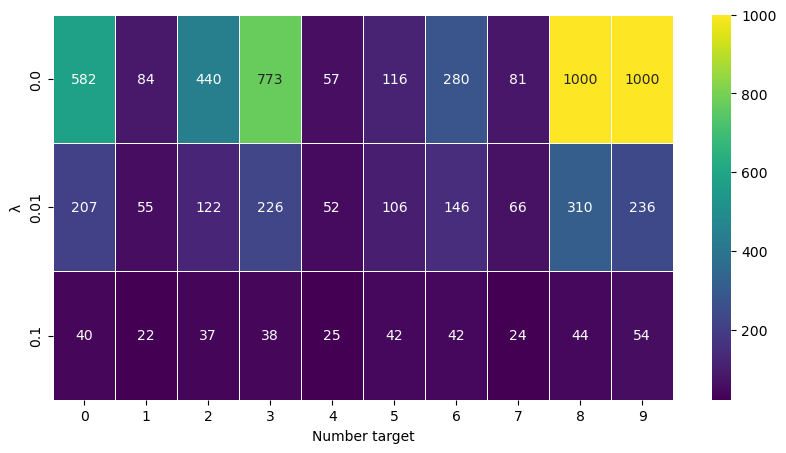

niter for isd = 3


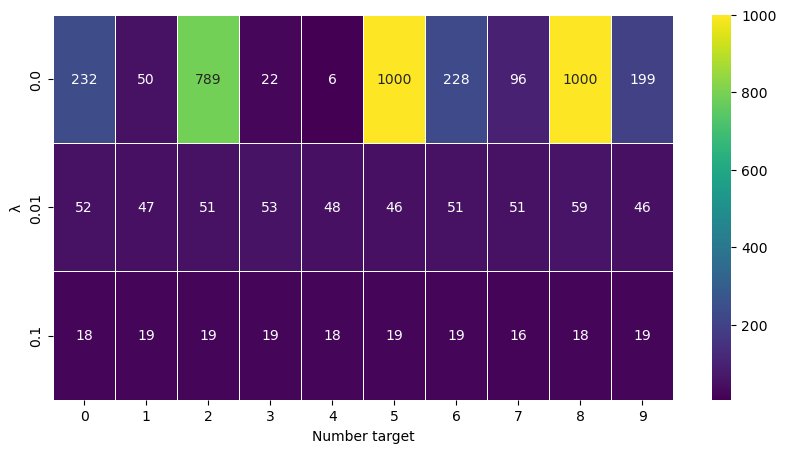

niter for isd = 7


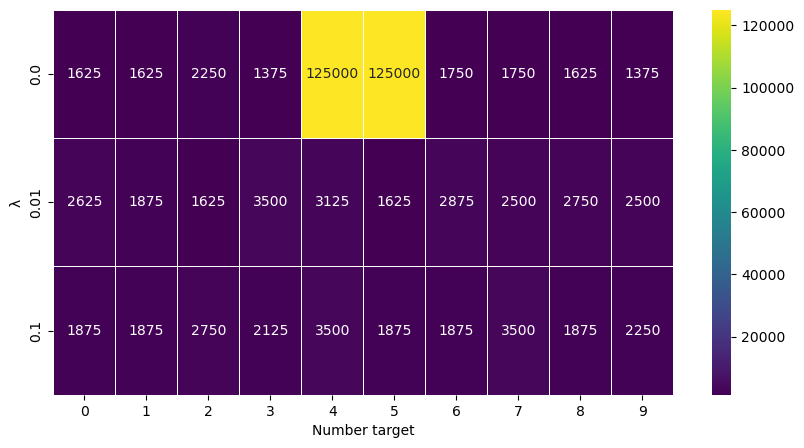

In [12]:
par = 'niter'
for isd in [1, 3, 7]:
    show_heatmap(dd, isd, par, fmt=".0f")
    plt.xlabel('Number target')
    plt.ylabel('λ')
    print(f'{par} for isd = ' + str(isd))
    plt.savefig(f'figures/niter_isd_{isd}.png', dpi=300, bbox_inches='tight')
    plt.show()

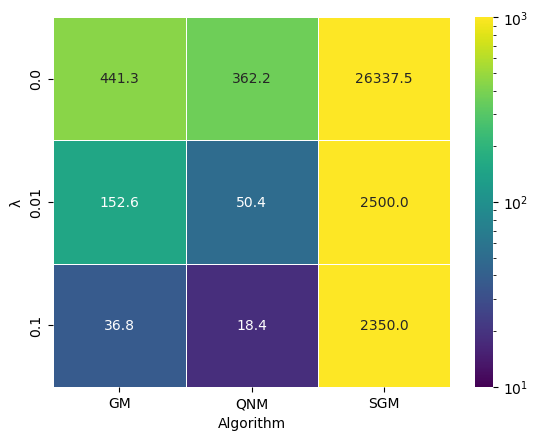

In [13]:
# generate a new dataset with the average number of iterations for each isd and la
def avg_niter(df):
    df = df[['isd', 'la', 'niter']]
    df = df.groupby(['isd', 'la']).mean()
    df = df.reset_index()
    return df

an = avg_niter(dd)
an['isd'] = an['isd'].apply(lambda x: isd_names[x])
norm = matplotlib.colors.LogNorm(vmin=1e1, vmax=1e3)
sns.heatmap(an.pivot_table(index='la', columns='isd', values='niter'),annot=True, fmt=".1f", linewidths=.5, cmap='viridis', norm=norm)
plt.xlabel('Algorithm')
plt.ylabel('λ')
plt.savefig('figures/avg_niter.png', dpi=300, bbox_inches='tight')
plt.show()

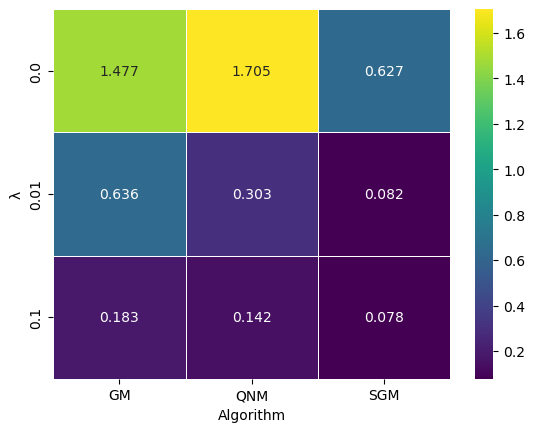

In [14]:
# generate a new dataset with the average tex for each isd and la
def avg_tex(df):
    df = df[['isd', 'la', 'tex']]
    df = df.groupby(['isd', 'la']).mean()
    df = df.reset_index()
    return df

at = avg_tex(dd)
at['isd'] = at['isd'].apply(lambda x: isd_names[x])
norm = None
sns.heatmap(at.pivot_table(index='la', columns='isd', values='tex'),annot=True, fmt=".3f", linewidths=.5, cmap='viridis', norm=norm)
plt.xlabel('Algorithm')
plt.ylabel('λ')
plt.savefig('figures/avg_tex.png', dpi=300, bbox_inches='tight')
plt.show()

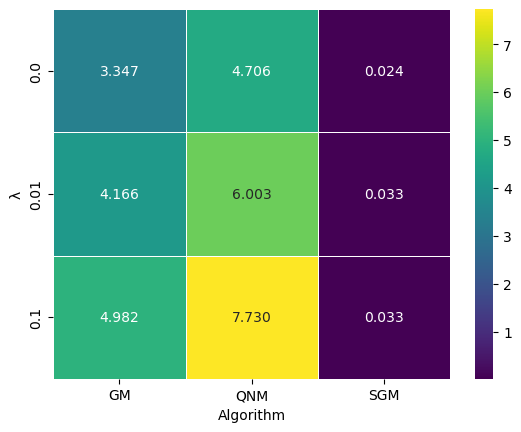

In [15]:
# plot avg tex/ avg niter
at['niter'] = an['niter']
at['tex/niter'] = (at['tex'] / at['niter'])*1000 # we keep the time in ms

sns.heatmap(at.pivot_table(index='la', columns='isd', values='tex/niter'),annot=True, fmt=".3f", linewidths=.5, cmap='viridis', norm=norm)
plt.xlabel('Algorithm')
plt.ylabel('λ')
plt.savefig('figures/avg_tex_niter.png', dpi=300, bbox_inches='tight')
plt.show()

# Study of the recognition accuracy

te_acc for isd = 1


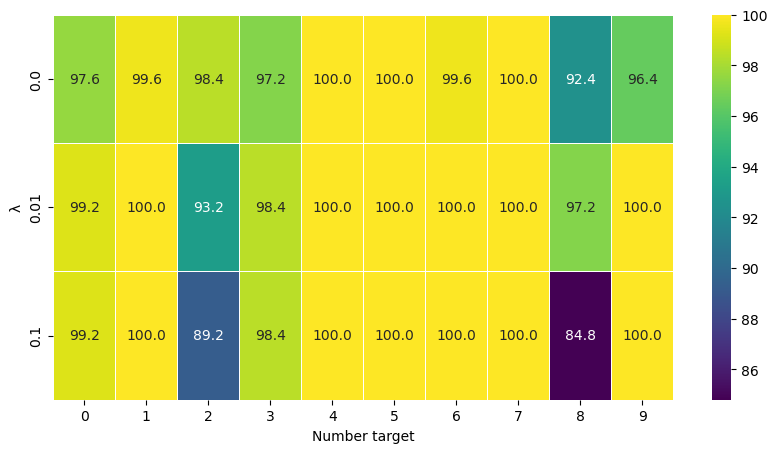

te_acc for isd = 3


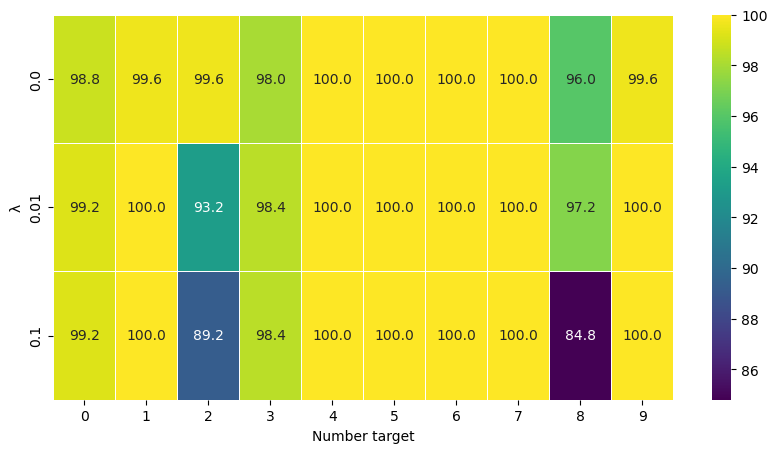

te_acc for isd = 7


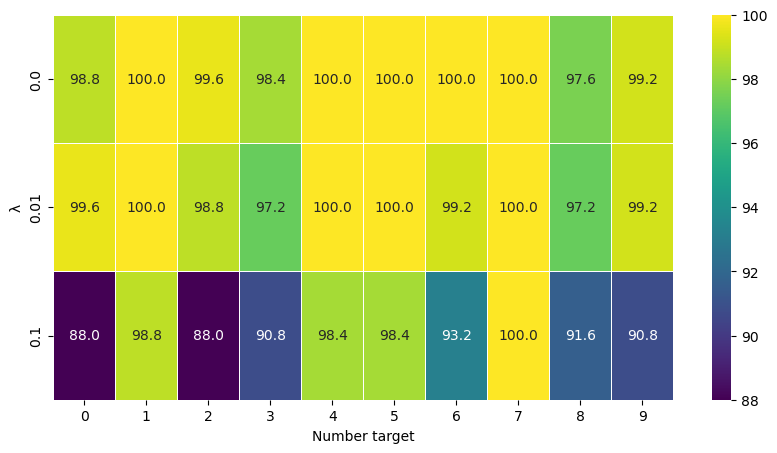

In [16]:
# show heatmap of the acuracy
par = 'te_acc'
for isd in [1, 3, 7]:
    show_heatmap(dd, isd, par, fmt=".1f")
    plt.xlabel('Number target')
    plt.ylabel('λ')
    print(f'{par} for isd = ' + str(isd))
    plt.savefig(f'figures/accuracy_isd_{isd}.png', dpi=300, bbox_inches='tight')
    plt.show()

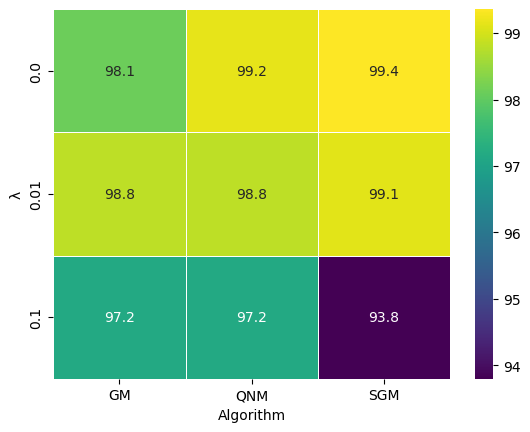

In [17]:
# average accuracy for each isd and la
def avg_acc(df):
    df = df[['isd', 'la', 'te_acc']]
    df = df.groupby(['isd', 'la']).mean()
    df = df.reset_index()
    return df

aa = avg_acc(dd)
aa['isd'] = aa['isd'].apply(lambda x: isd_names[x])
norm = None
sns.heatmap(aa.pivot_table(index='la', columns='isd', values='te_acc'),annot=True, fmt=".1f", linewidths=.5, cmap='viridis', norm=norm)
plt.xlabel('Algorithm')
plt.ylabel('λ')
plt.savefig('figures/avg_acc.png', dpi=300, bbox_inches='tight')
plt.show()

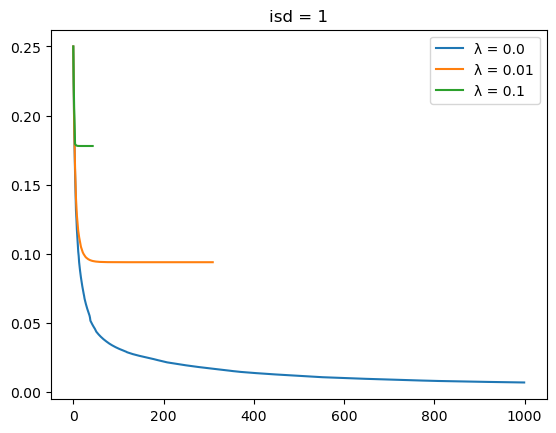

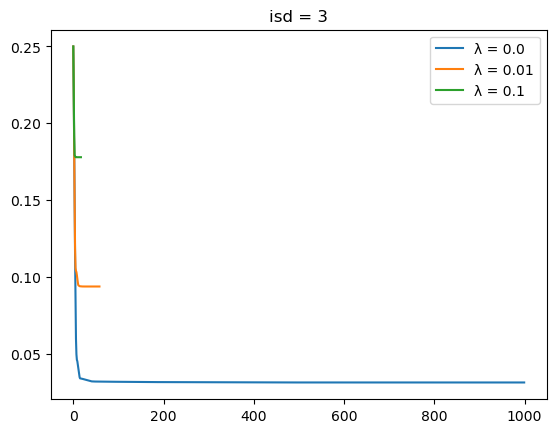

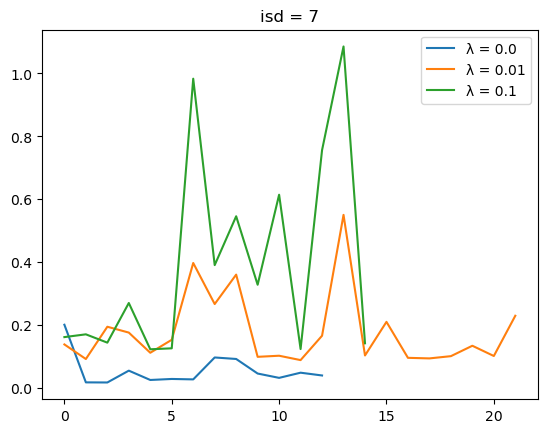

In [25]:
# scatter plot of Lk for each isd and each lambda and number_target = 8
for isd in [1, 3, 7]:
    t = dd[(dd['isd'] == isd) & (dd['num_target'] == 8)]
    for la in t['la'].unique():
        plt.plot(t[t['la'] == la]['Lk'].values[0], label=f'λ = {la}')
    plt.legend()
    plt.title(f'isd = {isd}')
    plt.show()





In [35]:
df = pd.read_csv('2uo_nn_batch_590152-171251704.csv', sep = ';')
df.columns = df.columns.str.replace(' ', '')
df.head()

,num_target,la,isd,niter,tex,tr_acc,te_acc,L*,||g*||,Lk
0,1,0.01,1,28,3.0796,99.9,99.9,0.021200,7.370000e-07,"0.25, 0.068094, 0.051442, 0.023903, 0.02..."
1,1,0.00,3,1000,91.3207,100.0,100.0,0.000010,2.260000e-05,"0.25, 0.06601, 0.00046065, 0.000144..."
2,1,0.00,7,100000,21.2570,100.0,100.0,0.000064,3.830000e-05,"0.0022718, 0.0014508, 0.0011494, 0.000984..."
3,2,0.01,1,77,7.7069,99.1,99.2,0.039500,8.910000e-07,"0.25, 0.091384, 0.069679, 0.048064, 0.04..."
4,2,0.00,3,1000,107.5807,99.8,99.6,0.001810,1.740000e-04,"0.25, 0.08961, 0.055836, 0.0218, ..."


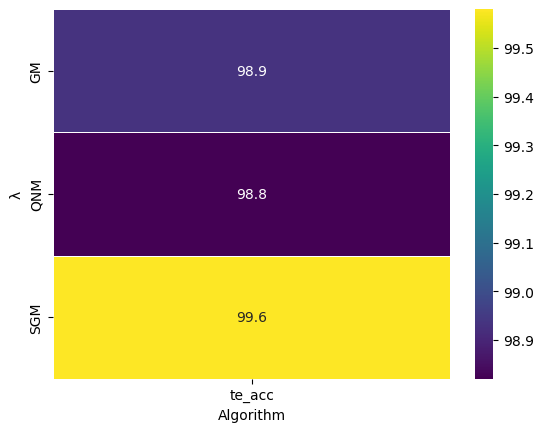

In [36]:
# average accuracy for each isd 
def avg_acc(df):
    # get only columns isd and te_acc
    df = df[['isd', 'te_acc']]
    df = df.groupby(['isd']).mean()
    df = df.reset_index()
    return df

aa = avg_acc(df)
aa['isd'] = aa['isd'].apply(lambda x: isd_names[x])
norm = None
sns.heatmap(aa.pivot_table(index='isd', values='te_acc'),annot=True, fmt=".1f", linewidths=.5, cmap='viridis', norm=norm)
plt.xlabel('Algorithm')
plt.ylabel('λ')
#plt.savefig('figures/avg_acc.png', dpi=300, bbox_inches='tight')
plt.show()


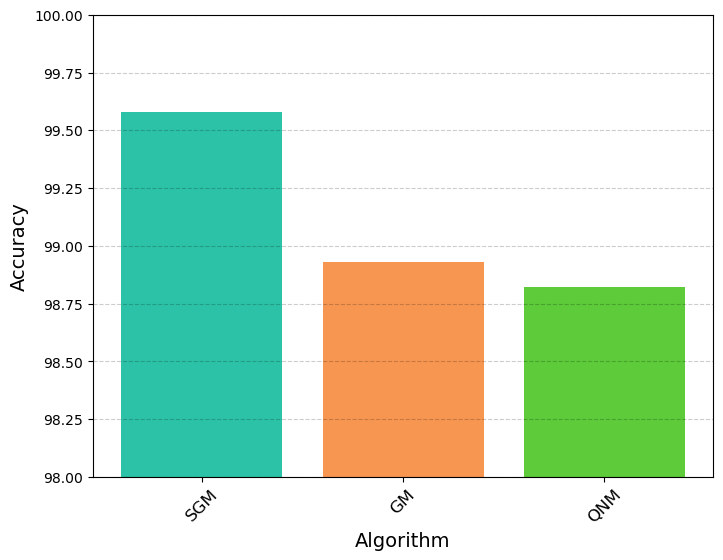

In [60]:
# bar plot of the average accuracy for each isd

# set axis from 90 to 100 and different colors for each isd and legend
def bar_avg_acc(df):
    df = df[['isd', 'te_acc']]
    df = df.groupby(['isd']).mean()
    df = df.reset_index()
    df['isd'] = df['isd'].apply(lambda x: isd_names[x])
    df = df.sort_values(by='te_acc', ascending=False)

    plt.figure(figsize=(8, 6))
    plt.bar(df['isd'], df['te_acc'], color=['#2CC2A7', '#F79651', '#5DCB3A'])
    plt.xticks(rotation=45, fontsize=12)
    plt.ylabel('Accuracy', fontsize=14)
    plt.xlabel('Algorithm', fontsize=14)
    plt.grid(axis='y', linestyle='--', color = 'black', alpha = 0.2)
    plt.ylim(98, 100)

    #save the figure
    plt.savefig('figures/bar_avg_acc.png', dpi=300, bbox_inches='tight')
    plt.show()

bar_avg_acc(df)


isd = 1


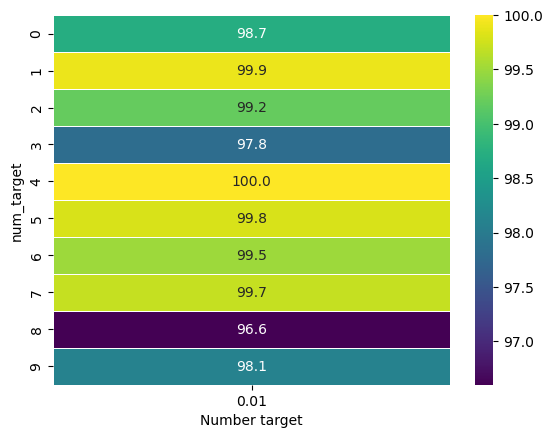

isd = 3


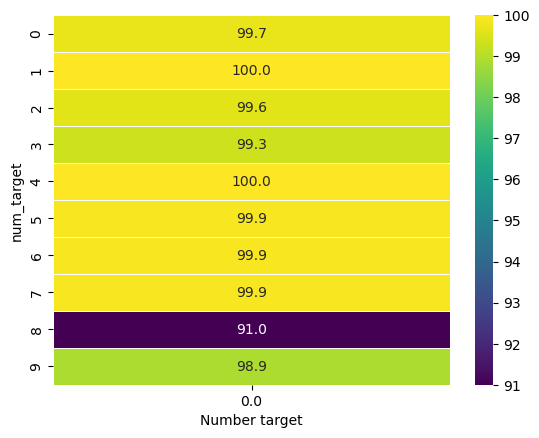

isd = 7


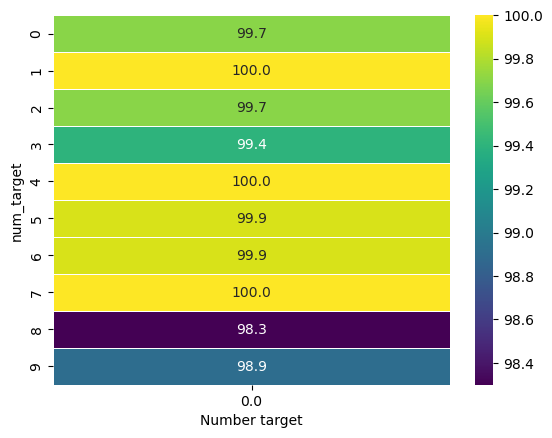

In [65]:
# acuracy for each isd and number separated plots for each isd
def show_heatmap(df, isd, par, fmt):
    df = df[df['isd'] == isd]
    df = df.pivot_table(index='num_target', columns='la', values=par)
    sns.heatmap(df, annot=True, fmt=fmt, linewidths=.5, cmap='viridis', norm=norm)

for isd in [1, 3, 7]:
    par = 'te_acc'
    show_heatmap(df, isd, par, fmt=".1f")
    plt.xlabel('Number target')
    print(f'isd = {isd}')
    #save the figure
    plt.savefig(f'figures/accuracy_isd_{isd}.png', dpi=300, bbox_inches='tight')
    plt.show()

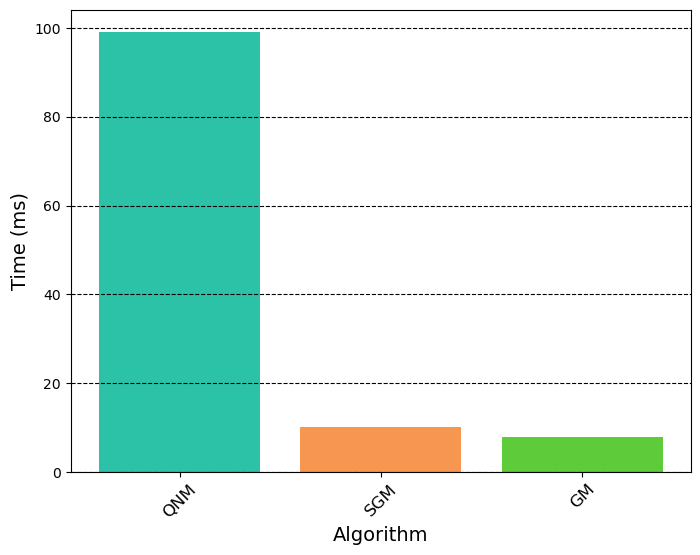

In [59]:
# bar plot of average tex for each isd
def bar_avg_tex(df):
    df = df[['isd', 'tex']]
    df = df.groupby(['isd']).mean()
    df = df.reset_index()
    df['isd'] = df['isd'].apply(lambda x: isd_names[x])
    df = df.sort_values(by='tex', ascending=False)

    plt.figure(figsize=(8, 6)) # Increase the size of the plot
    plt.bar(df['isd'], df['tex'], color=['#2CC2A7', '#F79651', '#5DCB3A'])
    plt.xticks(rotation=45, fontsize=12) # Increase the font size of the tick labels
    plt.ylabel('Time (ms)', fontsize=14) # Increase the font size of the y-axis label
    plt.xlabel('Algorithm', fontsize=14) # Increase the font size of the x-axis label
    plt.grid(axis='y', linestyle='--', color='black') # Add horizontal grid lines in black color
    plt.ylim(bottom=0) # Set the minimum y-axis value to 0
    #save the figure
    plt.savefig('figures/bar_avg_tex.png', dpi=300, bbox_inches='tight')
    plt.show()

bar_avg_tex(df)


isd = 1


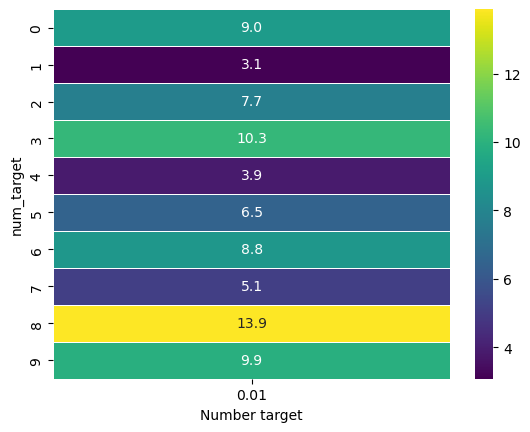

isd = 3


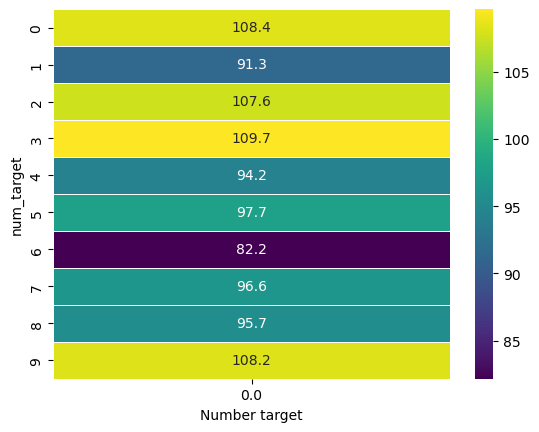

isd = 7


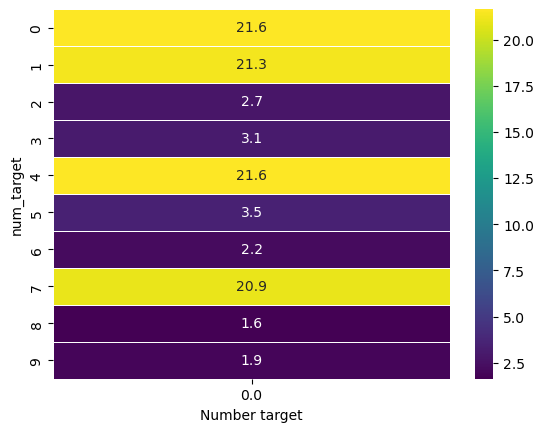

In [64]:
# execution time for each isd and number separated plots for each isd
def show_heatmap(df, isd, par, fmt):
    df = df[df['isd'] == isd]
    df = df.pivot_table(index='num_target', columns='la', values=par)
    sns.heatmap(df, annot=True, fmt=fmt, linewidths=.5, cmap='viridis', norm=norm)

for isd in [1, 3, 7]:
    par = 'tex'
    show_heatmap(df, isd, par, fmt=".1f")
    plt.xlabel('Number target')
    print(f'isd = {isd}')
    plt.show()
    